<a href="https://colab.research.google.com/github/shubham62025865/shubham1/blob/main/Lecture_6__Outlier_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 5 : Outliers

<img width="900" src="https://149695847.v2.pressablecdn.com/wp-content/uploads/2020/09/1.jpg" />


### **Definition of outliers.** 

#### An outlier is an observation that lies an abnormal distance from other values in a random sample from a population. In a sense, this definition leaves it up to the analyst (or a consensus process) to decide what will be considered abnormal.

<img width="700" src="https://i0.wp.com/statisticsbyjim.com/wp-content/uploads/2019/10/outlier_circled.png?resize=576%2C383&ssl=1" />



## Why outliers occur

An outlier may occur due to the variability in the data, or due to experimental error/human error.

They may indicate an experimental error or heavy skewness in the data(heavy-tailed distribution).

## What factors outliers affect

In statistics, we have three measures of central tendency namely Mean, Median, and Mode. They help us describe the data.

- Mean is the accurate measure to describe the data when we do not have any outliers present.

- Median is used if there is an outlier in the dataset.

- Mode is used if there is an outlier AND about ½ or more of the data is the same.

- ‘Mean’ is the only measure of central tendency that is affected by the outliers which in turn impacts Standard deviation.



In a large dataset, each individual point carries less weight, so an outlier is less worrisome than the same data point would be in a smaller dataset. Another consideration is “how much” of an outlier a point might be – just how far out of line with the rest of your dataset a single point is. A point that is ten times as large as your upper boundary will do more damage than a point that is twice as large.

**When to drop outliers**:-

-       You know that it’s wrong, For example, if you have a really good sense of what range the data should fall in, like people’s ages, you can safely drop values that are outside of that range.

-       You have a lot of data and outliers are few, so your sample won’t be hurt by dropping a questionable outlier.

-       In the case of salary of CEO, or another true outlier, sometimes it’s best to completely remove that record from your dataset to keep that person or event from skewing your analysis.

-       If the outlier creates a relationship where there isn’t one otherwise, we can safely drop those outliers.

**When not to drop outliers**:-
- There are a lot of outliers. Outliers are rare by definition. If, for example, 30% of your data is outliers, then it actually means that there’s something interesting going on with your data that you need to look further into.

-       Cap your outliers’ data, another way to handle true outliers is to cap them (Winsorization). For example, if you’re using income, you might find that people above a certain income level behave in the same way as those with a lower income. We can use percentile capping. Values that are less than the value at 1st percentile are replaced by the value at 1st percentile, and values that are greater than the value at 99th percentile are replaced by the value at 99th percentile. The winsorization at 5th and 95th percentile is also common.

-       Assign a new value, if an outlier seems to be due to a mistake in your data, you try imputing a value. Common imputation methods include using the mean or median of a variable based on the distribution of data or utilizing a regression model to predict the missing value.

-       Try a transformation, Square root and log transformations (It’s often preferred when the response variable follows exponential distribution or is right-skewed) both pull in high numbers.  This can make assumptions work better if the outlier is a dependent variable and can reduce the impact of a single point if the outlier is an independent variable.

-       Another option is to try a different model.  Tree based models like Random Forests and Gradient Boosting techniques, which are less impacted by outliers.

## Methods for detecting Outliers

- Boxplots (for visualizing outliers)
- Z-score (for normally distributed data)
- Inter Quantile Range(IQR) (for skewed data)
- percentile method

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

Dataset link - https://www.kaggle.com/code/justinas/nba-height-and-weight-analysis/data?select=all_seasons.csv

Height of the player (in centimeters)

Weight of the player (in kilograms)

In [ ]:
df = pd.read_csv("/content/all_seasons.csv")
df.head()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97


In [ ]:
df.drop(columns = ["Unnamed: 0"], inplace = True)

In [ ]:
df.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,27,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,24,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,58,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,9,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,10,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97


In [ ]:
df.shape

(11145, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11145 entries, 0 to 11144
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   player_name        11145 non-null  object 
 1   team_abbreviation  11145 non-null  object 
 2   age                11145 non-null  float64
 3   player_height      11145 non-null  float64
 4   player_weight      11145 non-null  float64
 5   college            11145 non-null  object 
 6   country            11145 non-null  object 
 7   draft_year         11145 non-null  object 
 8   draft_round        11145 non-null  object 
 9   draft_number       11145 non-null  object 
 10  gp                 11145 non-null  int64  
 11  pts                11145 non-null  float64
 12  reb                11145 non-null  float64
 13  ast                11145 non-null  float64
 14  net_rating         11145 non-null  float64
 15  oreb_pct           11145 non-null  float64
 16  dreb_pct           111

In [ ]:
df.columns

Index(['player_name', 'team_abbreviation', 'age', 'player_height',
       'player_weight', 'college', 'country', 'draft_year', 'draft_round',
       'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating', 'oreb_pct',
       'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'season'],
      dtype='object')

In [ ]:
df["player_weight"].describe()

count    11145.000000
mean       100.637868
std         12.576295
min         60.327736
25%         90.718400
50%         99.790240
75%        109.315672
max        163.293120
Name: player_weight, dtype: float64

plotly boxplot - https://plotly.com/python/box-plots/

In [ ]:
import plotly.express as px

fig = px.box(df, x="player_weight", width=800, height=400)
fig.show()

seaborn boxplot - https://seaborn.pydata.org/generated/seaborn.boxplot.html

<AxesSubplot:>

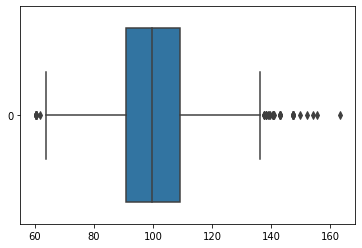

In [ ]:
sns.boxplot(data = df["player_weight"], orient = "h")

<AxesSubplot:>

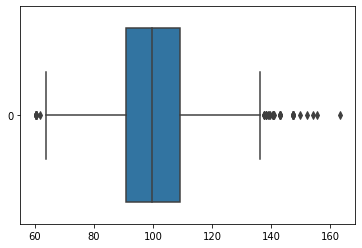

In [ ]:
sns.boxplot(data = df["player_weight"], orient = "h")

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='age'>

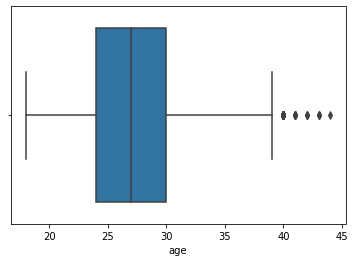

In [ ]:
sns.boxplot(df["age"])

<AxesSubplot:>

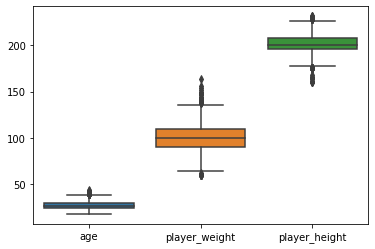

In [ ]:
sns.boxplot(data = df[["age", "player_weight", "player_height"]])

<AxesSubplot:>

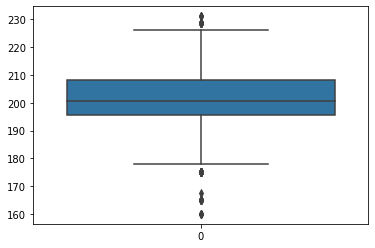

In [ ]:
sns.boxplot(data = df.player_height)

<AxesSubplot:>

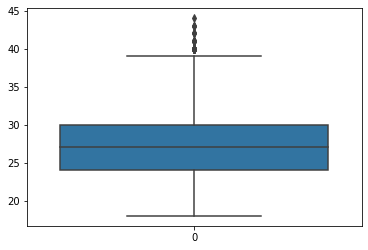

In [ ]:
sns.boxplot(data = df["age"])

Histogram - A histogram is a classic visualization tool that represents the distribution of one or more variables by counting the number of observations that fall within discrete bins.
https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot

KDE - A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analogous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

<AxesSubplot:xlabel='age', ylabel='Count'>

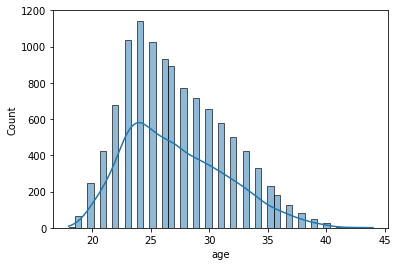

In [ ]:
sns.histplot(data = df.age, kde = True)

<AxesSubplot:xlabel='player_weight', ylabel='Count'>

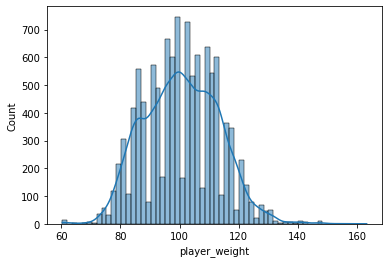

In [ ]:
sns.histplot(data = df.player_weight, kde = True)

<AxesSubplot:xlabel='player_height', ylabel='Count'>

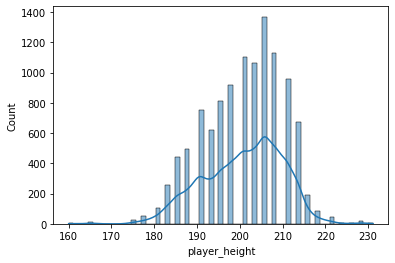

In [ ]:
sns.histplot(data = df["player_height"], kde = True)

<AxesSubplot:xlabel='age', ylabel='Count'>

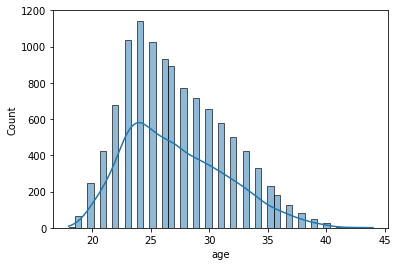

In [ ]:
sns.histplot(data = df["age"], kde = True)

<AxesSubplot:xlabel='player_weight', ylabel='Count'>

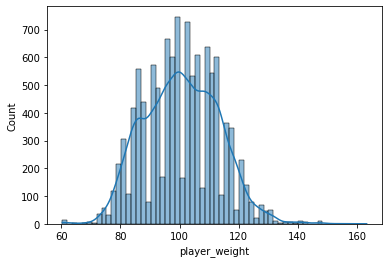

In [ ]:
sns.histplot(data = df["player_weight"], kde = True)

<AxesSubplot:xlabel='player_height', ylabel='Count'>

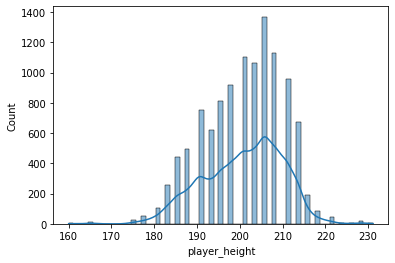

In [ ]:
sns.histplot(data = df["player_height"], kde = True)

<img src = https://upload.wikimedia.org/wikipedia/commons/c/cc/Relationship_between_mean_and_median_under_different_skewness.png />

Skewness - https://pythontic.com/pandas/dataframe-computations/skew

In [ ]:
df["age"].skew()

0.5458567811632224

In [ ]:
df["player_weight"].skew()

0.1469057175740028

In [ ]:
df["player_height"].skew()

-0.3775857815158464

## Detecting outliers using the Z-scores

**Criteria:** any data point whose Z-score falls out of 3rd standard deviation is an outlier.


<img width="500" src="https://editor.analyticsvidhya.com/uploads/39536outlierdetection.png" /> <img width="500" src="https://alleyezondata.com/content/article/statistics/img/Z-score.PNG" />

<img width="500" src="https://www.thoughtco.com/thmb/gItmqGd5HlnhyPIiLm1YHXOlTnw=/330x242/filters:fill(auto,1)/zscore-56a8fa785f9b58b7d0f6e87b.GIF" />

<img src = "https://www.thoughtco.com/thmb/qmSnmY_b1ztjvvdp-QhdT4-DA8c=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/calculate-a-sample-standard-deviation-3126345-v4-CS-01-5b76f58f46e0fb0050bb4ab2.png" width = 500 >


In [ ]:
df["player_weight"].describe()

count    11145.000000
mean       100.637868
std         12.576295
min         60.327736
25%         90.718400
50%         99.790240
75%        109.315672
max        163.293120
Name: player_weight, dtype: float64

In [ ]:
df.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,27,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,24,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,58,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,9,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,10,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97


In [ ]:
df["player_weight"].mean(), df["player_weight"].std()

(100.63786774840734, 12.576294953015232)

In [ ]:
(df["player_weight"] - df["player_weight"].mean())/ df["player_weight"].std()

0       -0.067399
1        1.375290
2       -0.428071
3        0.004736
4        0.653946
           ...   
11140    0.653946
11141   -0.247735
11142    1.375290
11143    0.329341
11144   -1.149415
Name: player_weight, Length: 11145, dtype: float64

In [ ]:
df["z_score_player_weight"] = (df["player_weight"] - df["player_weight"].mean())/ df["player_weight"].std()

In [ ]:
df.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,z_score_player_weight
0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,27,...,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97,-0.067399
1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,24,...,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97,1.375290
2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,58,...,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97,-0.428071
3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,9,...,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97,0.004736
4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,10,...,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97,0.653946


In [ ]:
df[(df["z_score_player_weight"] > 3) | (df["z_score_player_weight"] < -3)]

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,z_score_player_weight
331,Priest Lauderdale,ATL,23.0,223.52,155.582056,Central State (OH),USA,1996,1,28,...,1.2,0.3,-4.0,0.093,0.164,0.284,0.560,0.107,1996-97,4.368869
406,Oliver Miller,TOR,27.0,205.74,140.613520,Arkansas,USA,1992,1,22,...,5.0,1.4,-1.0,0.107,0.204,0.141,0.539,0.116,1996-97,3.178651
469,Priest Lauderdale,DEN,24.0,223.52,147.417400,Central State (OH),USA,1996,1,28,...,2.6,0.5,-6.2,0.093,0.251,0.268,0.460,0.121,1997-98,3.719659
480,Oliver Miller,TOR,28.0,205.74,147.417400,Arkansas,USA,1992,1,22,...,6.3,3.1,-9.9,0.099,0.177,0.149,0.485,0.187,1997-98,3.719659
641,Spud Webb,ORL,34.0,167.64,60.327736,North Carolina State,USA,1985,4,87,...,0.8,1.3,-24.6,0.067,0.038,0.252,0.466,0.294,1997-98,-3.205247
650,Shaquille O'Neal,LAL,26.0,215.90,142.881480,Louisiana State,USA,1992,1,1,...,11.4,2.4,15.6,0.114,0.236,0.331,0.587,0.125,1997-98,3.358987
1059,Shaquille O'Neal,LAL,27.0,215.90,142.881480,Louisiana State,USA,1992,1,1,...,10.7,2.3,6.4,0.135,0.227,0.325,0.584,0.132,1998-99,3.358987
1161,Oliver Miller,SAC,29.0,205.74,147.417400,Arkansas,USA,1992,1,22,...,2.0,0.0,-18.8,0.194,0.038,0.177,0.455,0.000,1998-99,3.719659
1326,Earl Boykins,CLE,24.0,165.10,60.327736,Eastern Michigan,USA,Undrafted,Undrafted,Undrafted,...,1.0,1.8,-11.8,0.046,0.076,0.245,0.547,0.345,1999-00,-3.205247
1556,Shaquille O'Neal,LAL,28.0,215.90,142.881480,Louisiana State,USA,1992,1,1,...,13.6,3.8,11.0,0.116,0.246,0.313,0.578,0.184,1999-00,3.358987


In [ ]:
df.shape

(11145, 22)

In [ ]:
11145 - 48

11097

In [ ]:
11111

In [ ]:
df_without_outlier = df[~((df["z_score_player_weight"] > 3) | (df["z_score_player_weight"] < -3))]

In [ ]:
df_without_outlier.shape

(11097, 22)

<AxesSubplot:xlabel='player_weight', ylabel='Count'>

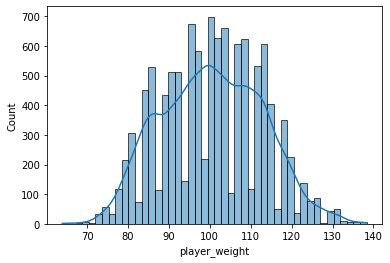

In [ ]:
sns.histplot(data = df_without_outlier["player_weight"], kde = True)

In [ ]:
df_without_outlier.player_weight.skew()

0.07188666926628842

In [ ]:
px.box(df, x = "player_weight")

In [ ]:
import plotly.express as px
px.box(df_without_outlier, x = "player_weight")

In [ ]:
(df["player_weight"] - df["player_weight"].mean())/ df["player_weight"].std()

0       -0.067399
1        1.375290
2       -0.428071
3        0.004736
4        0.653946
           ...   
11140    0.653946
11141   -0.247735
11142    1.375290
11143    0.329341
11144   -1.149415
Name: player_weight, Length: 11145, dtype: float64

In [ ]:
# calculating z score

df["z_score_player_weight"] = (df["player_weight"] - df["player_weight"].mean())/ df["player_weight"].std()
df.head()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,z_score_player_weight
0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,...,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97,-0.067399
1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,...,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97,1.375290
2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,...,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97,-0.428071
3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,...,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97,0.004736
4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,...,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97,0.653946


In [ ]:
# finding upper and lower limits

upper_limit = df["player_weight"].mean() + 3*df["player_weight"].std()
lower_limit = df["player_weight"].mean() - 3*df["player_weight"].std()
upper_limit, lower_limit

(138.36675260745304, 62.90898288936165)

In [ ]:
(df["player_weight"] > upper_limit) | (df["player_weight"] < lower_limit)

0        False
1        False
2        False
3        False
4        False
         ...  
11140    False
11141    False
11142    False
11143    False
11144    False
Name: player_weight, Length: 11145, dtype: bool

In [ ]:
# finding outliers
df[(df["player_weight"] > upper_limit) | (df["player_weight"] < lower_limit)]

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,z_score_player_weight
331,Priest Lauderdale,ATL,23.0,223.52,155.582056,Central State (OH),USA,1996,1,28,...,1.2,0.3,-4.0,0.093,0.164,0.284,0.560,0.107,1996-97,4.368869
406,Oliver Miller,TOR,27.0,205.74,140.613520,Arkansas,USA,1992,1,22,...,5.0,1.4,-1.0,0.107,0.204,0.141,0.539,0.116,1996-97,3.178651
469,Priest Lauderdale,DEN,24.0,223.52,147.417400,Central State (OH),USA,1996,1,28,...,2.6,0.5,-6.2,0.093,0.251,0.268,0.460,0.121,1997-98,3.719659
480,Oliver Miller,TOR,28.0,205.74,147.417400,Arkansas,USA,1992,1,22,...,6.3,3.1,-9.9,0.099,0.177,0.149,0.485,0.187,1997-98,3.719659
641,Spud Webb,ORL,34.0,167.64,60.327736,North Carolina State,USA,1985,4,87,...,0.8,1.3,-24.6,0.067,0.038,0.252,0.466,0.294,1997-98,-3.205247
650,Shaquille O'Neal,LAL,26.0,215.90,142.881480,Louisiana State,USA,1992,1,1,...,11.4,2.4,15.6,0.114,0.236,0.331,0.587,0.125,1997-98,3.358987
1059,Shaquille O'Neal,LAL,27.0,215.90,142.881480,Louisiana State,USA,1992,1,1,...,10.7,2.3,6.4,0.135,0.227,0.325,0.584,0.132,1998-99,3.358987
1161,Oliver Miller,SAC,29.0,205.74,147.417400,Arkansas,USA,1992,1,22,...,2.0,0.0,-18.8,0.194,0.038,0.177,0.455,0.000,1998-99,3.719659
1326,Earl Boykins,CLE,24.0,165.10,60.327736,Eastern Michigan,USA,Undrafted,Undrafted,Undrafted,...,1.0,1.8,-11.8,0.046,0.076,0.245,0.547,0.345,1999-00,-3.205247
1556,Shaquille O'Neal,LAL,28.0,215.90,142.881480,Louisiana State,USA,1992,1,1,...,13.6,3.8,11.0,0.116,0.246,0.313,0.578,0.184,1999-00,3.358987


In [ ]:
# removing outliers
# triming method
df = df[~((df["player_weight"] > upper_limit) | (df["player_weight"] < lower_limit))]

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,z_score_player_weight
0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,...,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97,-0.067399
1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,...,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97,1.375290
2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,...,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97,-0.428071
3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,...,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97,0.004736
4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,...,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97,0.653946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11140,11140,Maxi Kleber,DAL,28.0,208.28,108.862080,None,Germany,Undrafted,Undrafted,...,5.4,1.1,4.6,0.056,0.140,0.136,0.605,0.064,2019-20,0.653946
11141,11141,Melvin Frazier Jr.,ORL,23.0,195.58,97.522280,Tulane,USA,2018,2,...,0.3,0.1,-2.4,0.018,0.058,0.164,0.480,0.033,2019-20,-0.247735
11142,11142,Meyers Leonard,MIA,28.0,213.36,117.933920,Illinois,USA,2012,1,...,5.1,1.1,5.6,0.029,0.217,0.120,0.640,0.076,2019-20,1.375290
11143,11143,Norvel Pelle,PHI,27.0,208.28,104.779752,None,USA,Undrafted,Undrafted,...,3.0,0.4,-16.4,0.085,0.237,0.126,0.521,0.056,2019-20,0.329341


In [ ]:
df_no_outlier_trim = df[(df["player_weight"] <= upper_limit) & (df["player_weight"] >= lower_limit)]

In [ ]:
df_no_outlier_trim = df[(df["player_weight"] <= upper_limit) & (df["player_weight"] >= lower_limit)]

In [ ]:
df.shape, df_no_outlier_trim.shape

((11145, 23), (11097, 23))

In [ ]:
11145 - 11097

48

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


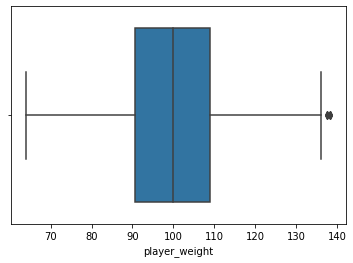

In [ ]:
sns.boxplot(data = df_no_outlier_trim["player_weight"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


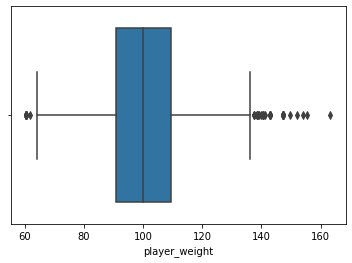

In [ ]:
sns.boxplot(df["player_weight"])

In [ ]:
x = 2
np.where(x>3, x + 3, x - 1)

array(1)

In [ ]:
upper_limit, lower_limit

(138.36675260745304, 62.90898288936165)

In [ ]:
df_clip = df.copy()
np.where(df_clip["player_weight"] > upper_limit, upper_limit,
         np.where(df_clip["player_weight"] < lower_limit, lower_limit,df_clip["player_weight"]))

array([ 99.79024 , 117.93392 ,  95.25432 , ..., 117.93392 , 104.779752,
        86.18248 ])

In [ ]:
df_clip["player_weight"] = np.where(df_clip["player_weight"] > upper_limit, upper_limit,
         np.where(df_clip["player_weight"] < lower_limit, lower_limit,df_clip["player_weight"]))

<AxesSubplot:xlabel='player_weight', ylabel='Count'>

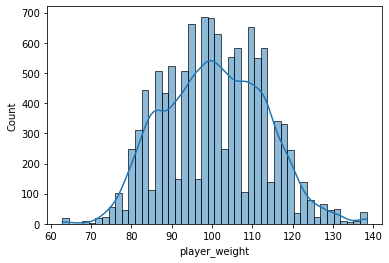

In [ ]:
sns.histplot(data = df_clip["player_weight"], kde = True)

In [ ]:
df_clip.player_weight.skew(), df_without_outlier.player_weight.skew(), df.player_weight.skew()

(0.10170214093485301, 0.07188666926628842, 0.1469057175740028)

In [ ]:
df.shape, df_clip.shape, df_without_outlier.shape

((11145, 22), (11145, 22), (11097, 22))

<AxesSubplot:>

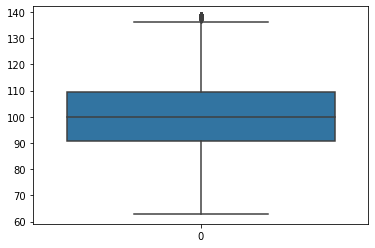

In [ ]:
sns.boxplot(data = df_clip["player_weight"])

<AxesSubplot:>

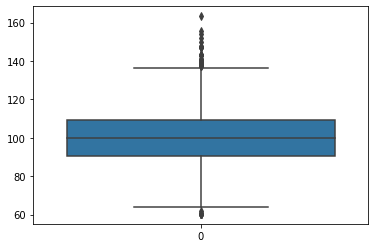

In [ ]:
sns.boxplot(data = df["player_weight"])

In [ ]:
# removing outliers through clipping method
# using np.where https://numpy.org/doc/stable/reference/generated/numpy.where.html

# np.where(condition, if condition is true then this value returned, else this value)
df_no_outlier_clip = df.copy()
df_no_outlier_clip["player_weight"] = np.where(
                      df_no_outlier_clip["player_weight"] > upper_limit,
                      upper_limit,
                      np.where(df_no_outlier_clip["player_weight"] < lower_limit,
                               lower_limit,
                               df_no_outlier_clip["player_weight"])
)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


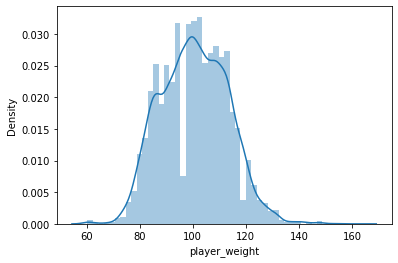

In [ ]:
sns.distplot(df["player_weight"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


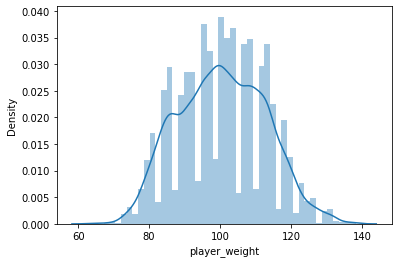

In [ ]:
sns.distplot(df_no_outlier_trim["player_weight"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


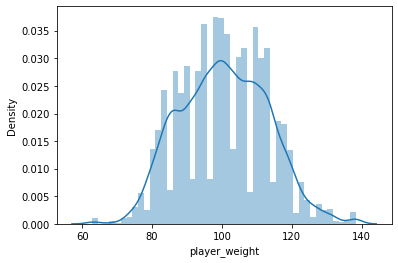

In [ ]:
sns.distplot(df_no_outlier_clip["player_weight"])

In [ ]:
y = pd.Series([12,13,15,16,16,20,30,32,35,36, 58, 67])
y.describe()

count    12.000000
mean     29.166667
std      17.938447
min      12.000000
25%      15.750000
50%      25.000000
75%      35.250000
max      67.000000
dtype: float64

In [ ]:

y.quantile(0.75) + 1.5*(y.quantile(0.75)- y.quantile(0.25))

64.5

In [ ]:
y.quantile(0.25) - 1.5*(y.quantile(0.75)- y.quantile(0.25))

-13.5

<AxesSubplot:>

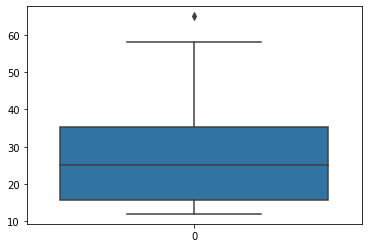

In [ ]:
sns.boxplot(data = y)

In [ ]:
import plotly.express as px
px.box(x = y)

In [ ]:
18 + 1.5*4

24.0

In [ ]:
y.quantile(0)

12.0

## Detecting outliers using the Inter Quantile Range(IQR)

<img width="700" src="https://editor.analyticsvidhya.com/uploads/12311IQR.png" />



**Criteria:** data points that lie 1.5 times of IQR above Q3 and below Q1 are outliers.

**steps:**
- Sort the dataset in ascending order
- calculate the 1st and 3rd quartiles(Q1, Q3)
- compute IQR=Q3-Q1
- compute lower bound = (Q1–1.5*IQR), upper bound = (Q3+1.5*IQR)
- filter data based on lower_bound and upper_bound

<AxesSubplot:xlabel='age', ylabel='Count'>

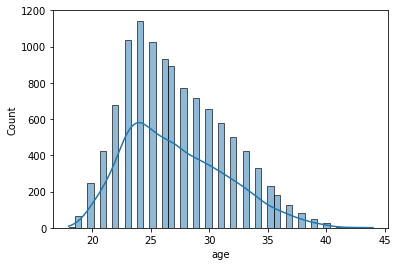

In [ ]:
sns.histplot(data = df["age"], kde = True)

<AxesSubplot:>

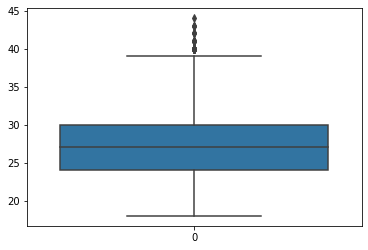

In [ ]:
sns.boxplot(data = df["age"])

In [ ]:
# step 1 - calculate IQR
iqr = df["age"].quantile(0.75) - df["age"].quantile(0.25)
iqr

6.0

In [ ]:
# step 2 calculate upper wisker and lower wisker
uw = df["age"].quantile(0.75) + 1.5*(iqr)
lw = df["age"].quantile(0.25) - 1.5*(iqr)
uw, lw

(39.0, 15.0)

In [ ]:
df_age_trim = df[(df["age"] <= uw ) & (df["age"] >= lw)]

In [ ]:
df.shape, df_age_trim.shape

((11145, 21), (11104, 21))

<AxesSubplot:>

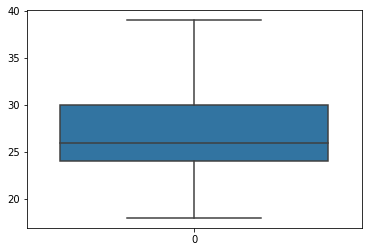

In [ ]:
sns.boxplot(data = df_age_trim["age"])

In [ ]:
# np.where(condition, if condition is true, if condition is not true)
df_age_clip = df.copy()

df_age_clip["age"] = np.where(df["age"] > uw, uw,
         np.where(df["age"] < lw, lw, df["age"]))

<AxesSubplot:>

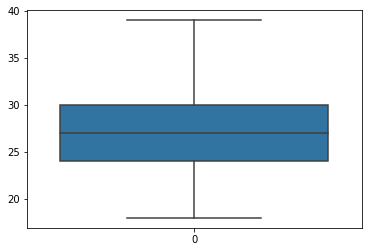

In [ ]:
sns.boxplot(data = df_age_clip["age"])

<AxesSubplot:xlabel='age', ylabel='Count'>

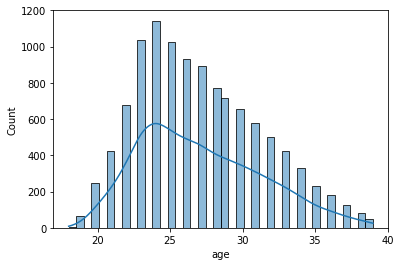

In [ ]:
sns.histplot(data = df_age_trim["age"], kde = True)

<AxesSubplot:xlabel='age', ylabel='Count'>

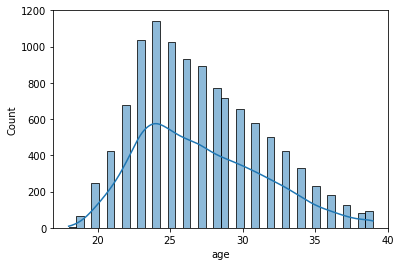

In [ ]:
sns.histplot(data = df_age_clip["age"], kde = True)

In [ ]:
df["age"].describe()

count    11145.000000
mean        27.168686
std          4.344164
min         18.000000
25%         24.000000
50%         27.000000
75%         30.000000
max         44.000000
Name: age, dtype: float64

In [ ]:
df["age"].quantile(.25)

24.0

In [ ]:
q1 = df["age"].quantile(.25)
q3 = df["age"].quantile(.75)
q3,q1

(30.0, 24.0)

In [ ]:
iqr = q3 - q1
iqr

6.0

In [ ]:
#compute lower bound = (Q1–1.5IQR), upper bound = (Q3+1.5IQR)
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
lower_bound, upper_bound

(18.0, 36.0)

In [ ]:
df[(df["age"] <lower_bound) | (df["age"] > upper_bound)]

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,z_score_player_weight
2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,...,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97,-0.428071
5,5,Eddie Johnson,HOU,38.0,200.66,97.522280,Illinois,USA,1981,2,...,2.7,1.0,4.1,0.034,0.126,0.220,0.541,0.102,1996-97,-0.247735
42,42,Dominique Wilkins,SAS,37.0,203.20,104.326160,Georgia,USA,1982,1,...,6.4,1.9,-10.3,0.101,0.154,0.297,0.517,0.118,1996-97,0.293273
81,81,Herb Williams,NYK,39.0,210.82,117.933920,Ohio State,USA,1981,1,...,1.5,0.2,-10.8,0.056,0.141,0.132,0.408,0.045,1996-97,1.375290
94,94,Frank Brickowski,BOS,37.0,205.74,108.862080,Penn State,USA,1981,3,...,2.0,0.9,-22.4,0.026,0.133,0.173,0.512,0.116,1996-97,0.653946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10532,10532,Jose Calderon,DET,37.0,190.50,90.718400,None,Spain,Undrafted,Undrafted,...,1.2,2.3,-14.0,0.015,0.078,0.104,0.453,0.282,2018-19,-0.788743
10955,10955,Tyson Chandler,HOU,37.0,213.36,106.594120,None,USA,2001,1,...,2.5,0.2,5.7,0.097,0.172,0.057,0.717,0.037,2019-20,0.473609
10957,10957,Udonis Haslem,MIA,39.0,203.20,106.594120,Florida,USA,Undrafted,Undrafted,...,2.7,0.3,-30.6,0.000,0.421,0.182,0.322,0.100,2019-20,0.473609
10960,10960,Vince Carter,ATL,43.0,198.12,99.790240,North Carolina,USA,1998,1,...,2.1,0.8,-8.6,0.019,0.116,0.163,0.464,0.082,2019-20,-0.067399


In [ ]:
df[(df["age"] < lower_bound) | (df["age"] > upper_bound)]

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,z_score_player_weight
2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,...,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97,-0.428071
5,5,Eddie Johnson,HOU,38.0,200.66,97.522280,Illinois,USA,1981,2,...,2.7,1.0,4.1,0.034,0.126,0.220,0.541,0.102,1996-97,-0.247735
42,42,Dominique Wilkins,SAS,37.0,203.20,104.326160,Georgia,USA,1982,1,...,6.4,1.9,-10.3,0.101,0.154,0.297,0.517,0.118,1996-97,0.293273
81,81,Herb Williams,NYK,39.0,210.82,117.933920,Ohio State,USA,1981,1,...,1.5,0.2,-10.8,0.056,0.141,0.132,0.408,0.045,1996-97,1.375290
94,94,Frank Brickowski,BOS,37.0,205.74,108.862080,Penn State,USA,1981,3,...,2.0,0.9,-22.4,0.026,0.133,0.173,0.512,0.116,1996-97,0.653946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10532,10532,Jose Calderon,DET,37.0,190.50,90.718400,None,Spain,Undrafted,Undrafted,...,1.2,2.3,-14.0,0.015,0.078,0.104,0.453,0.282,2018-19,-0.788743
10955,10955,Tyson Chandler,HOU,37.0,213.36,106.594120,None,USA,2001,1,...,2.5,0.2,5.7,0.097,0.172,0.057,0.717,0.037,2019-20,0.473609
10957,10957,Udonis Haslem,MIA,39.0,203.20,106.594120,Florida,USA,Undrafted,Undrafted,...,2.7,0.3,-30.6,0.000,0.421,0.182,0.322,0.100,2019-20,0.473609
10960,10960,Vince Carter,ATL,43.0,198.12,99.790240,North Carolina,USA,1998,1,...,2.1,0.8,-8.6,0.019,0.116,0.163,0.464,0.082,2019-20,-0.067399


In [ ]:
# remove outliers using trim

df_no_outlier_trim = df[(df["age"] >= lower_bound) & (df["age"]<= upper_bound)]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


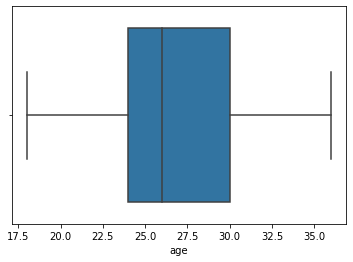

In [ ]:
sns.boxplot(df_no_outlier_trim["age"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


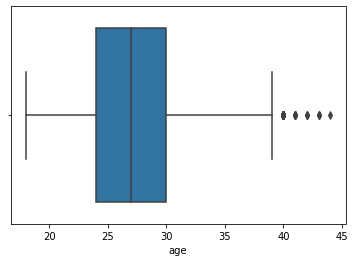

In [ ]:
sns.boxplot(df["age"])

In [ ]:
# removal through clipping

# removing outliers through clipping method
# using np.where https://numpy.org/doc/stable/reference/generated/numpy.where.html

# np.where(condition, if condition is true then this value returned, else this value)
df_no_outlier_clip = df.copy()
df_no_outlier_clip["age"] = np.where(
                      df_no_outlier_clip["age"] > upper_bound,
                      upper_bound,
                      np.where(df_no_outlier_clip["age"] < lower_bound,
                               lower_bound,
                               df_no_outlier_clip["age"])
)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


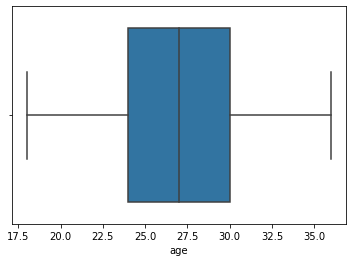

In [ ]:
sns.boxplot(df_no_outlier_clip["age"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


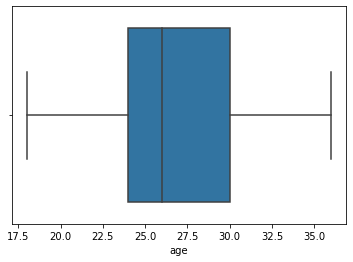

In [ ]:
sns.boxplot(df_no_outlier_trim["age"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


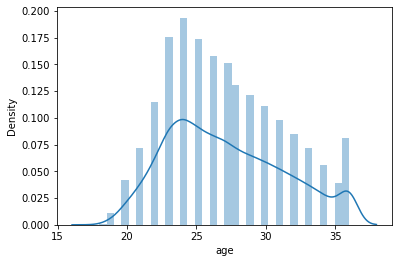

In [ ]:
sns.distplot(df_no_outlier_clip["age"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


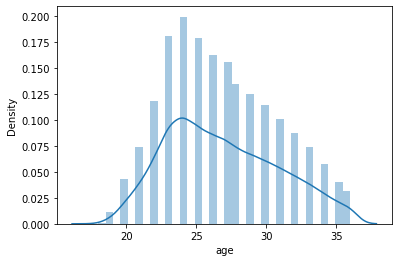

In [ ]:
sns.distplot(df_no_outlier_trim["age"])

# Percentile method

- This technique works by setting a particular threshold value, which decides based on our problem statement.
- Here we always maintain symmetry on both sides means if remove 1% from the right then in the left we also drop by 1%.
- While we remove the outliers using capping, then that particular method is known as Winsorization.
- For example, 90% winsorization means the replacement of the top 5% and bottom 5% of the data. The top 5% of the data is replaced by the value of the data at the 95th percentile and the value of the bottom 5% of the data is replaced by the value of the data at the 5th percentile. 



<img width="500" src="https://acutecaretesting.org/-/media/acutecaretesting/articles/fig-6-example.jpg?h=402&w=750" />

<AxesSubplot:>

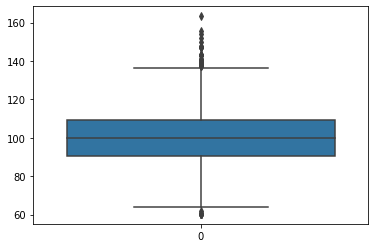

In [ ]:
sns.boxplot(data = df["player_weight"])

In [ ]:
upper_limit = df['player_weight'].quantile(0.99)
lower_limit = df['player_weight'].quantile(0.01)
upper_limit, lower_limit

(130.0357545599993, 74.84268)

In [ ]:
# trim outliers
df_no_outlier_trim = df[(df['player_weight'] <= upper_limit) & (df['player_weight'] >= lower_limit)]

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='player_weight'>

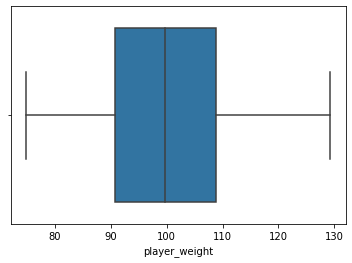

In [ ]:
sns.boxplot(df_no_outlier_trim["player_weight"])

In [ ]:
# Capping(Winsorization)
# np.where(condition, if condition is true then this value returned, else this value)
df_no_outlier_clip = df.copy()
df_no_outlier_clip["player_weight"] = np.where(
                      df_no_outlier_clip["player_weight"] > upper_limit,
                      upper_limit,
                      np.where(df_no_outlier_clip["player_weight"] < lower_limit,
                               lower_limit,
                               df_no_outlier_clip["player_weight"])
)

In [ ]:
weight = []
for value in df["player_weight"]:
  if value > upper_limit:
    weight.append(upper_limit)
  elif value < lower_limit:
    weight.append(lower_limit)
  else:
    weight.append(value)


In [ ]:
len(weight)

11145

In [ ]:
df.shape

(11145, 21)

In [ ]:
df1 = df.copy()
df1["player_weight"] = weight

<AxesSubplot:xlabel='player_weight', ylabel='Count'>

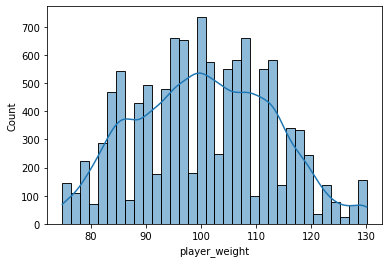

In [ ]:
sns.histplot(data  = df1["player_weight"], kde = True)

<AxesSubplot:xlabel='player_weight', ylabel='Count'>

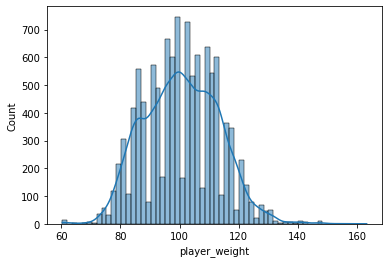

In [ ]:
sns.histplot(data  = df["player_weight"], kde = True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


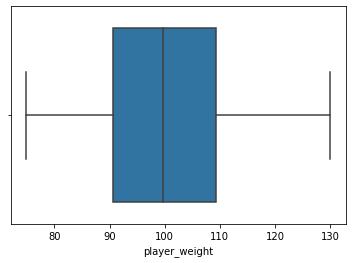

In [ ]:
sns.boxplot(df_no_outlier_clip["player_weight"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


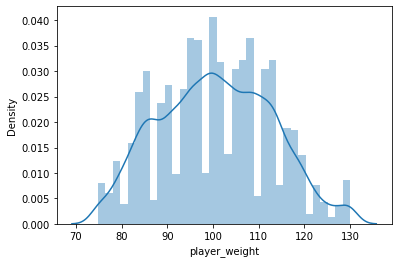

In [ ]:
sns.distplot(df_no_outlier_clip["player_weight"])